# Machine Learning on Heart Disease Classification


In [ ]:
# !pip install ydata-profiling
# !pip install scikit-optimize

In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings

# import libraries related to machine learning
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, average_precision_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# connect data source from google drive
from google.colab import drive
drive.mount("/content/gdrive")
path = "/content/gdrive/MyDrive/Colab Notebooks/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# load dataset
df = pd.read_csv(path +"Dataset Heart Disease.csv")
df.head()

Unnamed: 0  age  sex  chest pain type  resting bps  cholesterol  \
0           0   40    1                2          140        289.0   
1           1   49    0                3          160        180.0   
2           2   37    1                2          130        283.0   
3           3   48    0                4          138        214.0   
4           4   54    1                3          150        195.0   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  \
0                    0            0             172                0      0.0   
1                    0            0             156                0      1.0   
2                    0            1              98                0      0.0   
3                    0            0             108                1      1.5   
4                    0            0             122                0      0.0   

   ST slope  target  
0         1       0  
1         2       1  
2         1       0  
3         2       1  
4         1       0

# Data Preprocessing

In [ ]:
# Remove the unnecessary column 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Determine the number of unique elements of the data set
df.nunique()

age                     49
sex                      2
chest pain type          4
resting bps             63
cholesterol            221
fasting blood sugar      2
resting ecg              3
max heart rate         109
exercise angina          2
oldpeak                 43
ST slope                 4
target                   2
dtype: int64

In [ ]:
# Determine whether there are missing values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
# Determine whether there are duplicated records
df.duplicated().sum()

0

Observation:

- There are no null values or duplicate records in the dataset.

## Data Exploration

In [ ]:
# Explore the data
print("Dataset size (number of rows, number of columns):", df.shape)

Dataset size (number of rows, number of columns): (1048, 12)


In [ ]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1048 non-null   int64  
 1   sex                  1048 non-null   int64  
 2   chest pain type      1048 non-null   int64  
 3   resting bps          1048 non-null   int64  
 4   cholesterol          1048 non-null   float64
 5   fasting blood sugar  1048 non-null   int64  
 6   resting ecg          1048 non-null   int64  
 7   max heart rate       1048 non-null   int64  
 8   exercise angina      1048 non-null   int64  
 9   oldpeak              1048 non-null   float64
 10  ST slope             1048 non-null   int64  
 11  target               1048 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 98.4 KB


In [ ]:
# Descriptive statistics
df.describe()

age          sex  chest pain type  resting bps  cholesterol  \
count  1048.000000  1048.000000      1048.000000  1048.000000  1048.000000   
mean     53.325382     0.734733         2.817748   132.613550   245.172710   
std       9.397822     0.441686         1.118649    17.367605    57.101359   
min      28.000000     0.000000         1.000000    92.000000    85.000000   
25%      46.000000     0.000000         2.000000   120.000000   208.000000   
50%      54.000000     1.000000         3.000000   130.000000   239.000000   
75%      60.000000     1.000000         4.000000   140.000000   275.000000   
max      77.000000     1.000000         4.000000   200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1048.000000  1048.000000     1048.000000      1048.000000   
mean              0.162214     0.606870      142.918893         0.368321   
std               0.368823     0.763313       24.427115         0.482579   
min               0.000000     0.000000       69.000000         0.000000   
25%               0.000000     0.000000      125.000000         0.000000   
50%               0.000000     0.000000      144.000000         0.000000   
75%               0.000000     1.000000      162.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1048.000000  1048.000000  1048.000000  
mean      0.942366     1.532443     0.496183  
std       1.100429     0.611023     0.500224  
min      -0.100000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     0.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [ ]:
# Generate the profile report
profile = ProfileReport(df, title="Feature Profiling Report")

# Display the report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Selection

Feature importance refers to a score that indicates how useful each feature is in predicting the target variable, based on the model's internal mechanisms.

SelectKBest and f_classif (from sklearn.feature_selection) is a common method to identify the best features based on their statistical significance in relation to the target variable.

Feature selection before training helps identify and keep only the most relevant features based on their statistical relationship with the target variable before training a model. This can help reduce overfitting, improve model interpretability, and decrease training time.

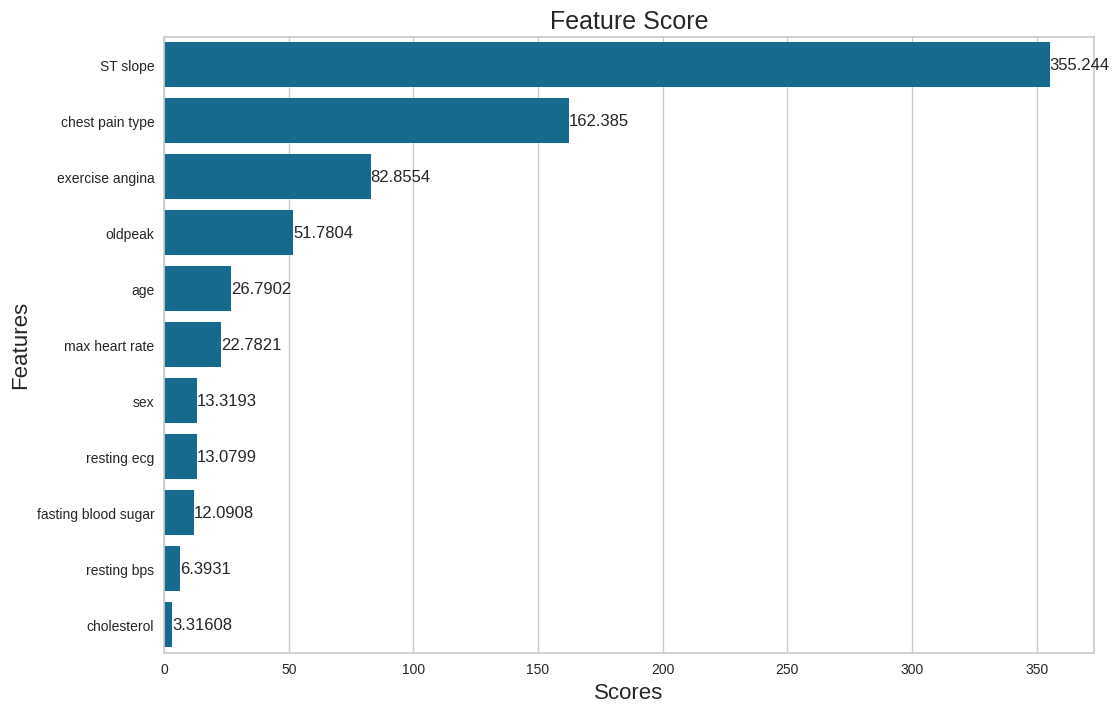

In [ ]:
# Create Features (X) and Target (y) variables
X = df.drop(['target'], axis=1)
y = df['target']

# Find out the best features for the model out of all features.

# Initialize SelectKBest class for finding features and applying on X and y variables
# f_classif: ANOVA (Analysis of Variance) F-test
selector = SelectKBest(f_classif, k=11)
X_selected = selector.fit_transform(X,y)

# Create list of all the columns and their score in variables
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a New Dataframe to store features and their scores
feature_score_df = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the created dataframe in descending order
feature_score_df = feature_score_df.sort_values(by='Scores', ascending=False)

# Plot a barplot to for better understanding of the features and scores
plt.figure(figsize=(12,8))
ax = sns.barplot(x=feature_score_df['Scores'], y=feature_score_df['Features'])
plt.title('Feature Score', fontsize=18)
plt.xlabel('Scores', fontsize=16)
plt.ylabel('Features', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [ ]:
# Drop the low scored features
X = X.drop(['resting bps', 'cholesterol'], axis=1)

In [ ]:
# Store all columns name in a variable
col = X.columns

# Initialize the Standard Scaler
sc = StandardScaler()

X[col] = sc.fit_transform(X[col])
X.head()

age       sex  chest pain type  fasting blood sugar  resting ecg  \
0 -1.418599  0.600865        -0.731363            -0.440025    -0.795428   
1 -0.460473 -1.664267         0.162999            -0.440025    -0.795428   
2 -1.737975  0.600865        -0.731363            -0.440025     0.515277   
3 -0.566932 -1.664267         1.057362            -0.440025    -0.795428   
4  0.071819  0.600865         0.162999            -0.440025    -0.795428   

   max heart rate  exercise angina   oldpeak  ST slope  
0        1.191094        -0.763598 -0.856771 -0.871811  
1        0.535772        -0.763598  0.052399  0.765569  
2       -1.839773        -0.763598 -0.856771 -0.871811  
3       -1.430196         1.309590  0.506984  0.765569  
4       -0.856789        -0.763598 -0.856771 -0.871811

## Splitting train and test dataset

In [ ]:
# 80% train set and 20% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = pd.DataFrame(X_test, columns=X_train.columns)  # Ensure same column names
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(838, 9)
(210, 9)
(838,)
(210,)


# Model 1: Gaussian Naive Bayes (GNB)

## **Comparison of GNB Approaches**

### Approach 1: Default settings

In [ ]:
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)

# Check the default parameters in an SVC
print(gnb_default.get_params())

# Calculate the Train Accuracy
training_score_gnb_default = gnb_default.score(X_train, y_train)*100
print("Train Accuracy using default settings: {:.2f}%".format(training_score_gnb_default))

# Calculate the Test Accuracy
testing_score_gnb_default = gnb_default.score(X_test, y_test)*100
print("Test Accuracy using default settings: {:.2f}%".format(testing_score_gnb_default))

{'priors': None, 'var_smoothing': 1e-09}
Train Accuracy using default settings: 73.63%
Test Accuracy using default settings: 75.71%


### Approach 2: Hyperparameter Tuning using GridSearchCV

In [ ]:
gnb = GaussianNB()

# Define the hyperparameter grid for tuning
param_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)  # A range of values for variance smoothing
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_gnb, cv=5, scoring='accuracy')
best_gnb = grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gnb = best_gnb.predict(X_test)

# Get the best hyperparameter and best cross-validation score
best_params_gnb = best_gnb.best_params_
best_score_gnb = best_gnb.best_score_

print(f"Best Hyperparameter: {best_params_gnb}")
print(f"Best Cross-Validation Accuracy: {best_score_gnb:.4f}")

# Calculate the Train Accuracy
training_score_gnb = best_gnb.score(X_train, y_train)*100
print("Train Accuracy with the best hyperparameter: {:.2f}%".format(training_score_gnb))

# Calculate the Test Accuracy
testing_score_gnb = best_gnb.score(X_test, y_test)*100
print("Test Accuracy with the best hyperparameter: {:.2f}%".format(testing_score_gnb))

Best Hyperparameter: {'var_smoothing': 0.3511191734215131}
Best Cross-Validation Accuracy: 0.7397
Train Accuracy with the best hyperparameter: 73.87%
Test Accuracy with the best hyperparameter: 74.76%


While the accuracy from Approach 1 might appear higher, the cross-validation accuracy from Approach 2 is a more reliable measure of the model’s true performance. This is because the cross-validation process provides a more robust estimate by evaluating the model across multiple data splits, leading to better generalization. Therefore, Approach 2 is used to build the model.

## **Performance Evaluations for GNB**

### Classification Report for GNB

In [ ]:
print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       104
           1       0.78      0.70      0.74       106

    accuracy                           0.75       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.75      0.75      0.75       210



### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for GNB

In [ ]:
# Define a function that encapsulates the plotting of the confusion matrix, ROC curve, learning curve, and precision-recall curve

def visualize_model_performance(model, model_name, X_train, y_train, X_test, y_test):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Create subplots for each visualizer
        fig, ax = plt.subplots(2, 2, figsize=(15, 10))

        # Confusion Matrix
        cm = ConfusionMatrix(model, ax=ax[0][0])
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.finalize()
        ax[0][0].set_title(f'Confusion Matrix for {model_name}')

        # ROC Curve
        roc_auc = ROCAUC(model, ax=ax[0][1])
        roc_auc.fit(X_train, y_train)
        roc_auc.score(X_test, y_test)
        roc_auc.finalize()
        ax[0][1].set_title(f'ROC Curve for {model_name}')

        # Learning Curve
        learning_curve = LearningCurve(model, scoring='f1_weighted', ax=ax[1][0])
        learning_curve.fit(X_train, y_train)
        learning_curve.finalize()
        ax[1][0].set_title(f'Learning Curve for {model_name}')

        # Precision-Recall Curve
        pr_curve = PrecisionRecallCurve(model, ax=ax[1][1])
        pr_curve.fit(X_train, y_train)
        pr_curve.score(X_test, y_test)
        pr_curve.finalize()
        ax[1][1].set_title(f'Precision-Recall Curve for {model_name}')

        plt.tight_layout()
        plt.show()

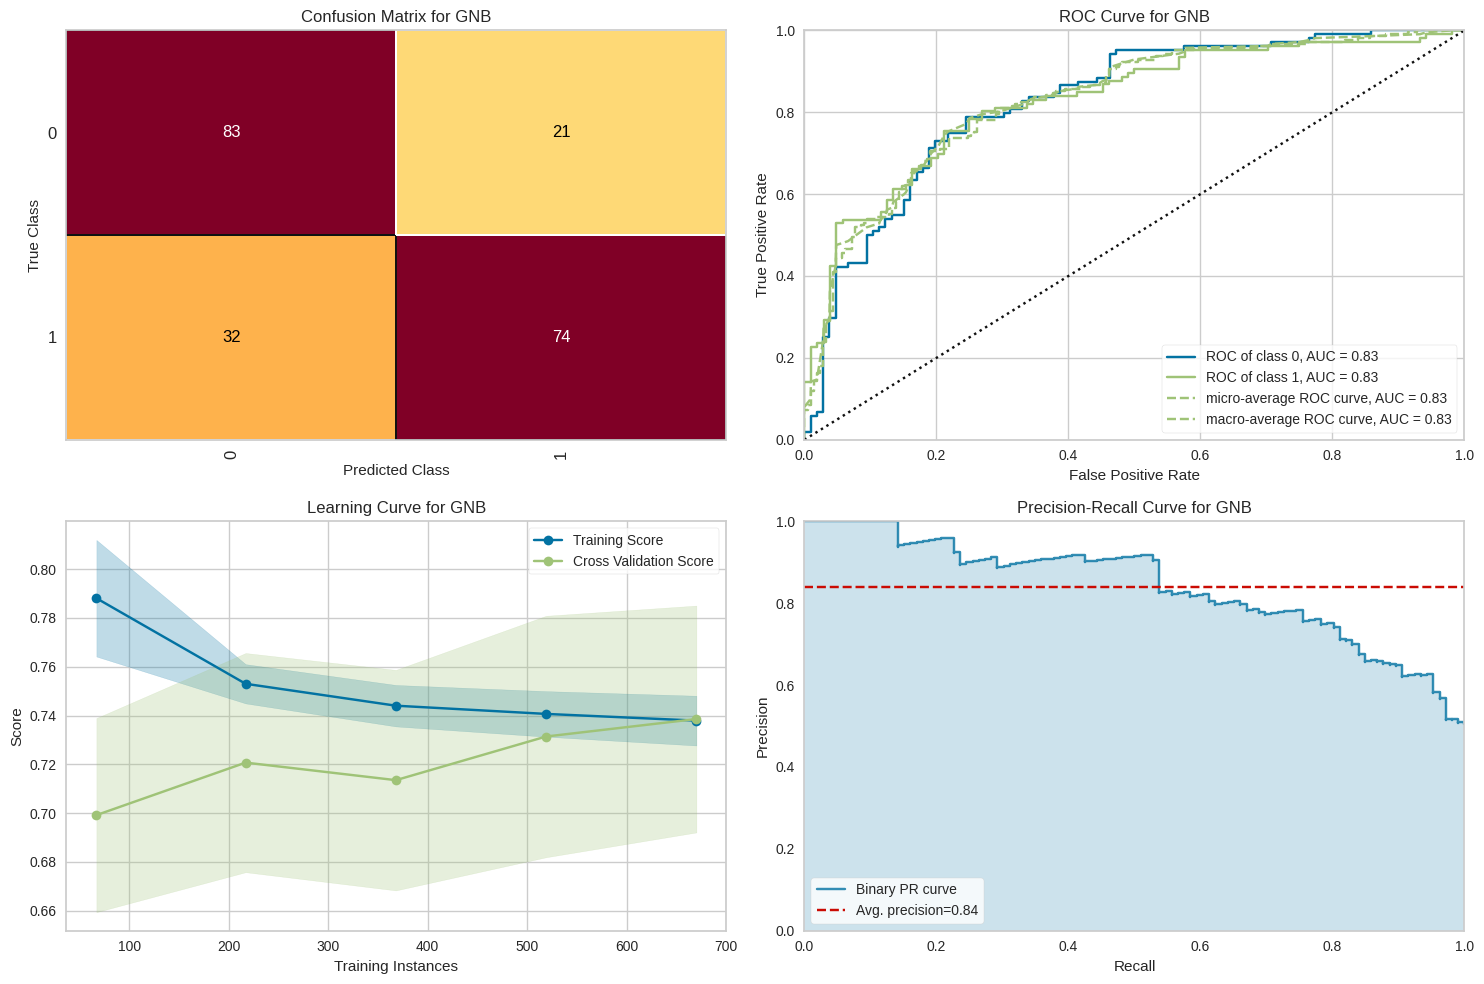

In [ ]:
visualize_model_performance(best_gnb, "GNB", X_train, y_train, X_test, y_test)

## **Permutation Importance**

After training the model, using permutation importance provides a more nuanced assessment, as it evaluates feature importance in the context of the trained model's performance. This second assessment on feature importance can reveal interactions or dependencies between features that were not apparent before, allowing for further refinement.

In [ ]:
# Calculate Permutation Importance
gnb_permutation_importance = permutation_importance(best_gnb, X_test, y_test, n_repeats=30, random_state=42)

print("Number of Features:", len(X.columns))
print("Permutation Importances Mean Length:", len(gnb_permutation_importance.importances_mean))

Number of Features: 9
Permutation Importances Mean Length: 9


               Feature  Importance       Std
8             ST slope    0.076508  0.024863
2      chest pain type    0.030635  0.013563
6      exercise angina    0.010476  0.014307
3  fasting blood sugar    0.003810  0.009712
7              oldpeak   -0.002063  0.012214
1                  sex   -0.005556  0.006158
5       max heart rate   -0.006190  0.008532
4          resting ecg   -0.006984  0.007943
0                  age   -0.014921  0.007350


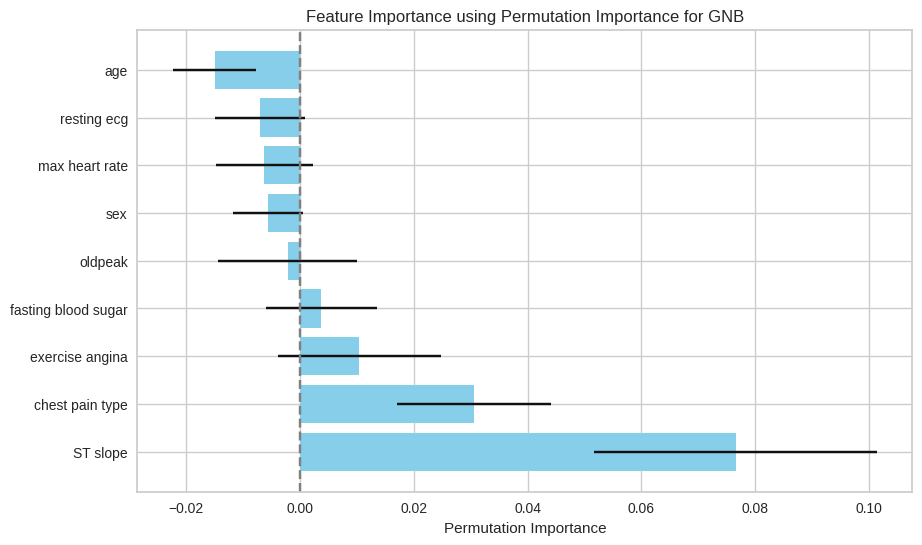

In [ ]:
# Create a DataFrame for feature importances
gnb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gnb_permutation_importance.importances_mean,
    'Std': gnb_permutation_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(gnb_feature_importances)

# Plotting the Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(gnb_feature_importances['Feature'], gnb_feature_importances['Importance'], xerr=gnb_feature_importances['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance for GNB')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.show()

Insights from the Data:
- Most Important Feature: ST slope has the highest importance score of 0.076508, indicating its strong impact on the model's predictions among all the features.
- Positive Contribution: The chest pain type feature has a positive contribution to the model's predictions, though with a relatively low importance score of 0.030635.
- Less Important Features: Features such as exercise angina and fasting blood sugar show low importance scores (0.010476 and 0.003810, respectively), suggesting they have a minimal impact on the model's predictions.
- Negative Contributions: Several features, including age, resting ecg, max heart rate, sex, and oldpeak, exhibit negative importance scores. This indicates that increases in these features may lead to lower predicted outcomes, depending on the context of the target variable.
- Variability: The standard deviation values provide insight into the consistency of the importance scores. Features like ST slope have a moderate variability (0.024863), while others, such as sex, show relatively low variability (0.006158), suggesting that their importance remains stable across different permutations.

### Feature Elimination

In [ ]:
# Dropping features with negative importance
features_to_drop = gnb_feature_importances[gnb_feature_importances['Importance'] < 0]['Feature'].tolist()
X_reduced_gnb = X.drop(columns=features_to_drop)

# Split the reduced dataset into training and testing sets
X_train_reduced_gnb, X_test_reduced_gnb, y_train_reduced_gnb, y_test_reduced_gnb = train_test_split(X_reduced_gnb, y, test_size=0.2, random_state=42)

### Model Retraining

In [ ]:
gnb_reduced_grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_gnb, cv=5, scoring='accuracy')
gnb_reduced_grid_search.fit(X_train_reduced_gnb, y_train_reduced_gnb)

# Get the best parameters and best score from the grid search
gnb_best_params_reduced = gnb_reduced_grid_search.best_params_
gnb_best_score_reduced = gnb_reduced_grid_search.best_score_

print(f"Best Hyperparameters after dropping negative features: {gnb_best_params_reduced}")
print(f"Best Cross-Validation Accuracy after dropping negative features: {gnb_best_score_reduced:.4f}")

# Retrain the GNB model with the best hyperparameters
best_gnb_reduced = GaussianNB(var_smoothing=gnb_best_params_reduced['var_smoothing'])
best_gnb_reduced.fit(X_train_reduced_gnb, y_train_reduced_gnb)

# Make predictions on the reduced test set
y_pred_gnb_reduced = best_gnb_reduced.predict(X_test_reduced_gnb)

# Calculate the Train Accuracy
train_accuracy_gnb_reduced = best_gnb_reduced.score(X_train_reduced_gnb, y_train_reduced_gnb) * 100
print(f"Train Accuracy with best hyperparameters after dropping negative features: {train_accuracy_gnb_reduced:.2f}%")

# Calculate the Test Accuracy
test_accuracy_gnb_reduced = best_gnb_reduced.score(X_test_reduced_gnb, y_test_reduced_gnb) * 100
print(f"Test Accuracy with best hyperparameters after dropping negative features: {test_accuracy_gnb_reduced:.2f}%")

Best Hyperparameters after dropping negative features: {'var_smoothing': 0.8111308307896871}
Best Cross-Validation Accuracy after dropping negative features: 0.7660
Train Accuracy with best hyperparameters after dropping negative features: 76.73%
Test Accuracy with best hyperparameters after dropping negative features: 77.62%


### Performance Evaluations after Feature Elimination

#### Classification Report for GNB

In [ ]:
print(classification_report(y_test_reduced_gnb, y_pred_gnb_reduced))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       104
           1       0.79      0.75      0.77       106

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210



#### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for GNB

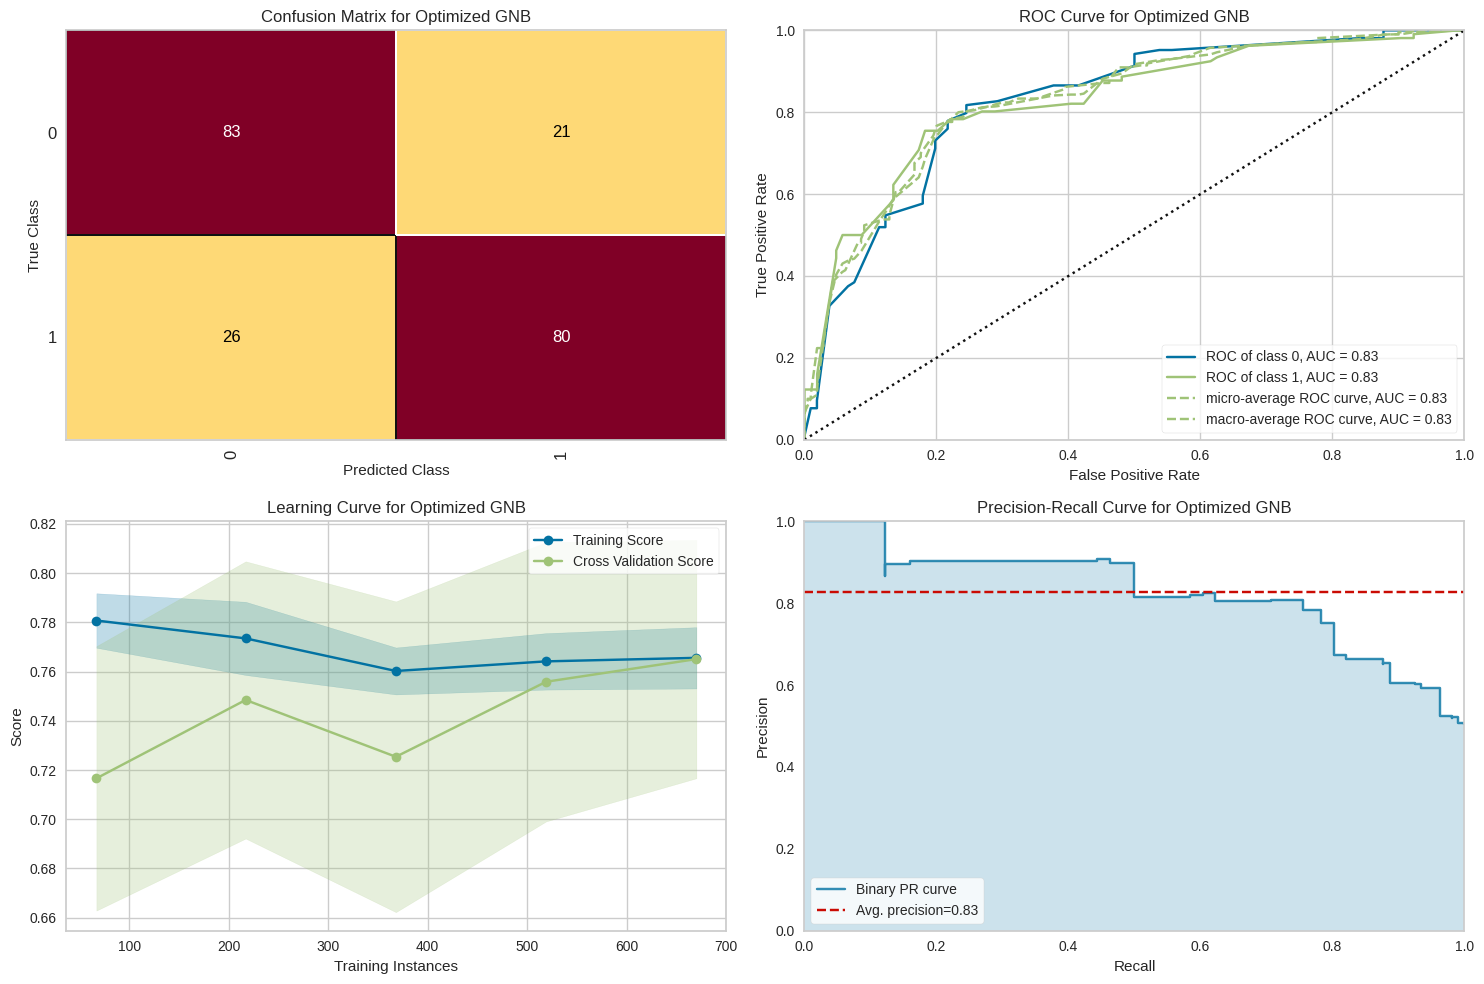

In [ ]:
# Visualize model performance for the best GNB model
visualize_model_performance(best_gnb_reduced, "Optimized GNB", X_train_reduced_gnb, y_train_reduced_gnb, X_test_reduced_gnb, y_test_reduced_gnb)

# Model 2: K-Nearest Neighbor Classifier (KNN)

## **Comparison of KNN Approaches**

### Approach 1: Default Settings

In [ ]:
# Initialize the KNN classifier with default parameters
knn_default = KNeighborsClassifier()

# Fit the model to the training data
knn_default.fit(X_train, y_train)

# Check the default parameters in an SVC
print(knn_default.get_params())

# Calculate the Train Accuracy
train_accuracy_default = knn_default.score(X_train, y_train) * 100
print("Train Accuracy with default settings: {:.2f}%".format(train_accuracy_default))

# Calculate the Test Accuracy
y_pred = knn_default.predict(X_test)  # Make predictions on the test set
test_accuracy_default = knn_default.score(X_test, y_test) * 100
print("Test Accuracy with default settings: {:.2f}%".format(test_accuracy_default))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Train Accuracy with default settings: 84.01%
Test Accuracy with default settings: 75.71%


### Approach 2: Direct Training and Testing (Manual Tuning)

This aprraoch provides a straightforward comparison of training and test accuracy across a range of k values. While this approach effectively illustrated the relationship between k and model performance, it lacks the rigor of automated hyperparameter tuning and cross-validation, which are essential for thorough model evaluation.

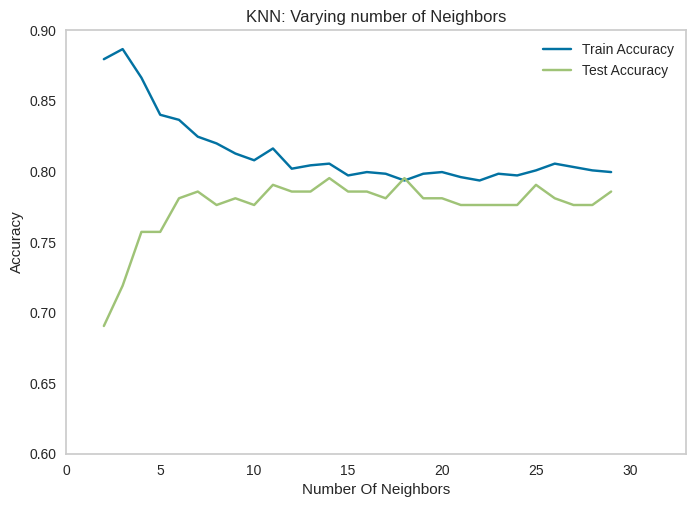

In [ ]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)


# Plot the Train Score and Test Score
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()


In [ ]:
# Find the best parameter ‘k’
print('The best k in this approach:')

for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

The best k in this approach:
14
18


In [ ]:
n_neighbors=14

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# Fit the model to the training data
knn.fit(X_train, y_train)

# Calculate the Train Accuracy for the tuned model
train_accuracy_manual_14 = knn.score(X_train, y_train) * 100
print("\nTrain Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, train_accuracy_manual_14))

# Calculate the Test Accuracy for the tuned model
test_accuracy_manual_14 = knn.score(X_test, y_test) * 100
print("Test Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, test_accuracy_manual_14))


Train Accuracy with n_neighbors=14: 80.55%
Test Accuracy with n_neighbors=14: 79.52%


In [ ]:
n_neighbors=18

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Calculate the Train Accuracy for the tuned model
train_accuracy_manual_18 = knn.score(X_train, y_train) * 100
print("\nTrain Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, train_accuracy_manual_18))

# Calculate the Test Accuracy for the tuned model
test_accuracy_manual_18 = knn.score(X_test, y_test) * 100
print("Test Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, test_accuracy_manual_18))


Train Accuracy with n_neighbors=18: 79.36%
Test Accuracy with n_neighbors=18: 79.52%


### Approach 3: Cross-Validation (Manual Tuning)

This approach systematically assesses the impact of varying the number of neighbors (k) on model performance through cross-validation. This method generates training and validation accuracy metrics for multiple k values, allowing for visualization of the validation error curve. However, it does not automatically identify the optimal k nor consider the potential influence of other hyperparameters.

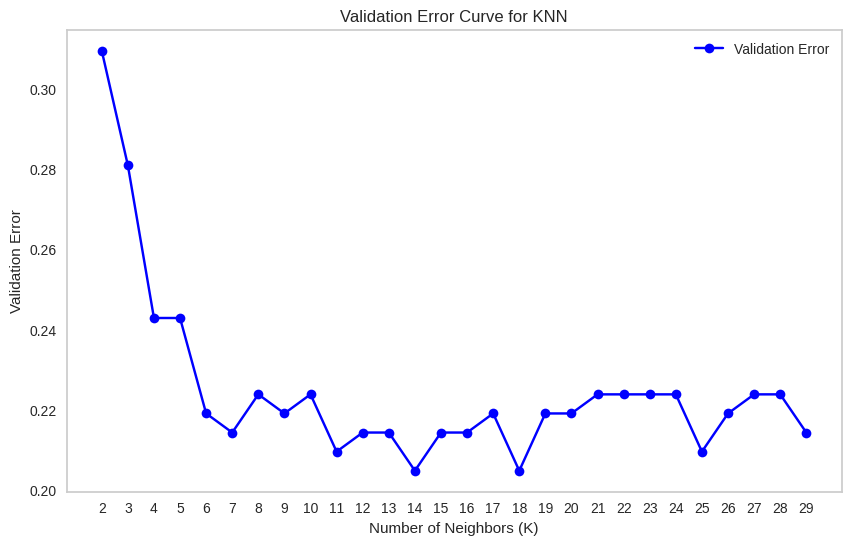

In [ ]:
# Range for the number of neighbors
k_values = range(2, 30)  # Testing K from 2 to 29
train_accuracies = []
validation_accuracies = []

# Loop over different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate cross-validated accuracy on the training set
    train_accuracy = d(knn, X_train, y_train, cv=5)
    train_accuracies.append(np.mean(train_accuracy))

    # Fit the model and calculate accuracy on the test set
    knn.fit(X_train, y_train)
    validation_accuracy = knn.score(X_test, y_test)
    validation_accuracies.append(validation_accuracy)

# Calculate validation error
validation_errors = [1 - val_acc for val_acc in validation_accuracies]

# Plot the validation error curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, validation_errors, marker='o', label='Validation Error', color='blue')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Validation Error')
plt.title('Validation Error Curve for KNN')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Calculate validation error
validation_errors = [1 - val_acc for val_acc in validation_accuracies]

# Find the first minimum validation error point before it starts to increase
min_error = float('inf')
best_k = None
for i in range(1, len(validation_errors)):
    if validation_errors[i] < min_error:
        min_error = validation_errors[i]
        best_k = k_values[i]
    elif validation_errors[i] > min_error:
        break

print(f"The best k in this approach: {best_k}")

The best k in this approach: 7


In [ ]:
n_neighbors=7

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Calculate the Train Accuracy for the tuned model
train_accuracy_manual_7 = knn.score(X_train, y_train) * 100
print("\nTrain Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, train_accuracy_manual_7))

# Calculate the Test Accuracy for the tuned model
test_accuracy_manual_7 = knn.score(X_test, y_test) * 100
print("Test Accuracy with n_neighbors={}: {:.2f}%".format(n_neighbors, test_accuracy_manual_7))


Train Accuracy with n_neighbors=7: 82.46%
Test Accuracy with n_neighbors=7: 78.57%


### Approach 4: Hyperparameter Tuning using GridSearchCV

Recognizing the limitations of the abovementioned approaches, the focus shifts to utilizing GridSearchCV for comprehensive hyperparameter optimization. This approach systematically explores a parameter grid, automatically identifying the best combination of hyperparameters, including the optimal number of neighbors (k). Additionally, it incorporates cross-validation, which means that the data is split into multiple subsets to assess model performance across different training and validation sets. This enhances the reliability of the model evaluation process by ensuring that the results are not dependent on a single data split, thereby providing a more robust estimate of how the model will perform on unseen data.

In [ ]:
# Define the parameter grid
params_knn_1 = {
    'n_neighbors': np.arange(2, 30, 1)  # Testing 'n_neighbors' from 2 to 29
}

# Use GridSearchCV to determine the best_params_ for n_neighbors, metric, weights
knn = KNeighborsClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
grid_knn_1 = GridSearchCV(knn, param_grid = params_knn_1, cv = kf, n_jobs = -1)

# Fit the model to the training data
grid_knn_1.fit(X_train, y_train)

# Output the tuning method used
print("Method 1: N-Neighbors Tuning")

# Print the best hyperparameters and best cross-validation score achieved during the hyperparameter tuning process
print("Best Hyperparameters in this method:", grid_knn_1.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_knn_1.best_score_:.4f}")

# Evaluate the performance of the best model
grid_knn_best_1 = grid_knn_1.best_estimator_

# Calculate the Train Accuracy
train_accuracy_1 = grid_knn_best_1.score(X_train, y_train)*100
print("Train Accuracy with best hyperparameters in this method: {:.2f}%".format(train_accuracy_1))

# Calculate the Test Accuracy
test_accuracy_1 = grid_knn_best_1.score(X_test, y_test) * 100
print("Test Accuracy with best hyperparameters in this method: {:.2f}%".format(test_accuracy_1))

Method 1: N-Neighbors Tuning
Best Hyperparameters in this method: {'n_neighbors': 22}
Best Cross-Validation Accuracy: 0.7888
Train Accuracy with best hyperparameters in this method: 79.36%
Test Accuracy with best hyperparameters in this method: 77.62%


In [ ]:
# Define the parameter grid
params_knn_2 = {
    'n_neighbors': np.arange(2, 30, 1),  # Testing 'n_neighbors' from 2 to 29
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Different distance metrics
    'weights': ['uniform', 'distance']  # Different weighting strategies
}

# Use GridSearchCV to determine the best_params_ for n_neighbors, metric, weights
knn = KNeighborsClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
grid_knn_2 = GridSearchCV(knn, param_grid = params_knn_2, cv = kf, n_jobs = -1)

# Fit the model to the training data
grid_knn_2.fit(X_train, y_train)

# Output the tuning method used
print("Method 2: Metric, N-Neighbors, Weights Tuning")

# Print the best hyperparameters and best cross-validation score achieved during the hyperparameter tuning process
print("Best Hyperparameters in this method:", grid_knn_2.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_knn_2.best_score_:.4f}")

# Evaluate the performance of the best model
grid_knn_best_2 = grid_knn_2.best_estimator_

# Calculate the Train Accuracy
train_accuracy_2 = grid_knn_best_2.score(X_train, y_train)*100
print("Train Accuracy with best hyperparameters in this method: {:.2f}%".format(train_accuracy_2))

# Calculate the Test Accuracy
test_accuracy_2 = grid_knn_best_2.score(X_test, y_test) * 100
print("Test Accuracy with best hyperparameters in this method: {:.2f}%".format(test_accuracy_2))

Method 2: Metric, N-Neighbors, Weights Tuning
Best Hyperparameters in this method: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8079
Train Accuracy with best hyperparameters in this method: 100.00%
Test Accuracy with best hyperparameters in this method: 77.62%


Interpretation of Results:

- Training Accuracy (100.00%):
A training accuracy of 100% indicates that the KNN model perfectly classified all instances in the training dataset. This typically suggests that the model has memorized the training data, including any noise or outliers.
While this might seem ideal, achieving 100% accuracy on the training set often raises concerns about overfitting. Overfitting occurs when a model learns the training data too well, capturing noise instead of generalizing from patterns.

- Test Accuracy (77.62%):
The test accuracy of 77.62% indicates that the model correctly classified approximately 77.62% of the instances in the test dataset (unseen data).
The significant drop from 100% training accuracy to 77.62% test accuracy suggests that the model is overfitting. It performs well on the training data but struggles to generalize to new, unseen data.

Key Insights:

 - Overfitting: The large discrepancy between training and testing accuracy is a classic sign of overfitting. The model is likely too complex, capturing noise and specific patterns in the training data that do not generalize to the test set.
In KNN, overfitting is often associated with using a very small k (number of neighbors). However, in our case, k is set to 17, which is relatively large but still might not be sufficient to prevent overfitting, especially if the training set is small or if there are noise and outliers.


In [ ]:
# Define the parameter grid
params_knn_3 = {
    'n_neighbors': np.arange(2, 30, 1),  # Testing 'n_neighbors' from 2 to 29
    'weights': ['uniform', 'distance']  # Different weighting strategies
}

# Use GridSearchCV to determine the best_params_ for n_neighbors and weights
knn = KNeighborsClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
grid_knn_3 = GridSearchCV(knn, param_grid = params_knn_3, cv = kf, n_jobs = -1)

# Fit the model to the training data
grid_knn_3.fit(X_train, y_train)

# Output the tuning method used
print("Method 3: N-Neighbors and Weights Tuning")

# Print the best hyperparameters and best cross-validation score achieved during the hyperparameter tuning process
print("Best Hyperparameters in this method:", grid_knn_3.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_knn_3.best_score_:.4f}")

# Evaluate the performance of the best model
grid_knn_best_3 = grid_knn_3.best_estimator_

# Calculate the Train Accuracy
train_accuracy_3 = grid_knn_best_3.score(X_train, y_train)*100
print("Train Accuracy with best hyperparameters in this method: {:.2f}%".format(train_accuracy_3))

# Calculate the Test Accuracy
test_accuracy_3 = grid_knn_best_3.score(X_test, y_test) * 100
print("Test Accuracy with best hyperparameters in this method: {:.2f}%".format(test_accuracy_3))

Method 3: N-Neighbors and Weights Tuning
Best Hyperparameters in this method: {'n_neighbors': 20, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.7971
Train Accuracy with best hyperparameters in this method: 100.00%
Test Accuracy with best hyperparameters in this method: 77.14%


In [ ]:
# Define the parameter grid
params_knn_4 = {
    'n_neighbors': np.arange(2, 30, 1),  # Testing 'n_neighbors' from 2 to 29
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Different distance metrics
}

# Use GridSearchCV to determine the best_params_ for n_neighbors and metric
knn = KNeighborsClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
grid_knn_4 = GridSearchCV(knn, param_grid = params_knn_4, cv = kf, n_jobs = -1)

# Fit the model to the training data
grid_knn_4.fit(X_train, y_train)

# Output the tuning method used
print("Method 4: N-Neighbors and Metric Tuning")

# Print the best hyperparameters and best cross-validation score achieved during the hyperparameter tuning process
print("Best Hyperparameters in this method:", grid_knn_4.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_knn_4.best_score_:.4f}")

# Evaluate the performance of the best model
grid_knn_best_4 = grid_knn_4.best_estimator_

# Calculate the Train Accuracy
train_accuracy_4 = grid_knn_best_4.score(X_train, y_train)*100
print("Train Accuracy with best hyperparameters in this method: {:.2f}%".format(train_accuracy_4))

# Calculate the Test Accuracy
test_accuracy_4 = grid_knn_best_4.score(X_test, y_test) * 100
print("Test Accuracy with best hyperparameters in this method: {:.2f}%".format(test_accuracy_4))

Method 4: N-Neighbors and Metric Tuning
Best Hyperparameters in this method: {'metric': 'manhattan', 'n_neighbors': 25}
Best Cross-Validation Accuracy: 0.7995
Train Accuracy with best hyperparameters in this method: 80.31%
Test Accuracy with best hyperparameters in this method: 78.57%


Interpretation of Results:
- Training Accuracy (80.31%):
A training accuracy of 80.31% indicates that the KNN model correctly classified approximately 80.31% of the instances in the training dataset.
This level of accuracy suggests that the model has learned to identify patterns in the training data reasonably well without overfitting excessively, as indicated by a score that is not 100%.
- Test Accuracy (78.57%):
The test accuracy of 78.57% suggests that the model is able to generalize reasonably well to unseen data. This is a good sign, as it indicates that the model is not simply memorizing the training data but is capable of making predictions on new instances.
The test accuracy is slightly lower than the training accuracy, which is typical in machine learning models.

Key Insights:
- Improved Generalization:
The improvement in both training and test accuracies compared to the previous models (which had a 100% training accuracy and a test accuracy about 77% in Method 2 and Method 3) indicates that tuning the model parameters has helped improve generalization.
The choice of n_neighbors=25 appears to provide a better balance between bias and variance, reducing the risk of overfitting while still achieving reasonable accuracy.
- Close Scores:
The training accuracy (80.31%) and test accuracy (78.57%) are relatively close, suggesting that the model is not overfitting significantly and is generalizing well to the test data.
- Our decision: Method 4’s test accuracy of 78.57% slightly exceeds that of Method 1, reinforcing our decision to select Method 4 for its enhanced performance

## **Performance Evaluations for KNN**

### Classification Report for KNN

In [ ]:
# Train KNN classifer and make predictions with the best parameters found from GridSearchCV
best_knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan')
best_knn.fit(X_train, y_train)

# Make predictions on the test dataset (X_test)
y_pred_knn = best_knn.predict(X_test)

# Get Probability Estimates for the Positive Class
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       104
           1       0.79      0.79      0.79       106

    accuracy                           0.79       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.79      0.79      0.79       210



Interpretation of Results:
- Balanced Performance: The precision, recall, and F1-scores for both classes are similar and around 0.79, indicating that the model performs consistently across classes.
- Good Overall Accuracy: An accuracy of 79% is generally considered good, especially in binary classification problems, depending on the context and dataset.
- Class Distribution: The support values indicate that the classes are relatively balanced in the dataset (104 instances of class 0 and 106 instances of class 1), which is beneficial for model training and evaluation.

### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for KNN

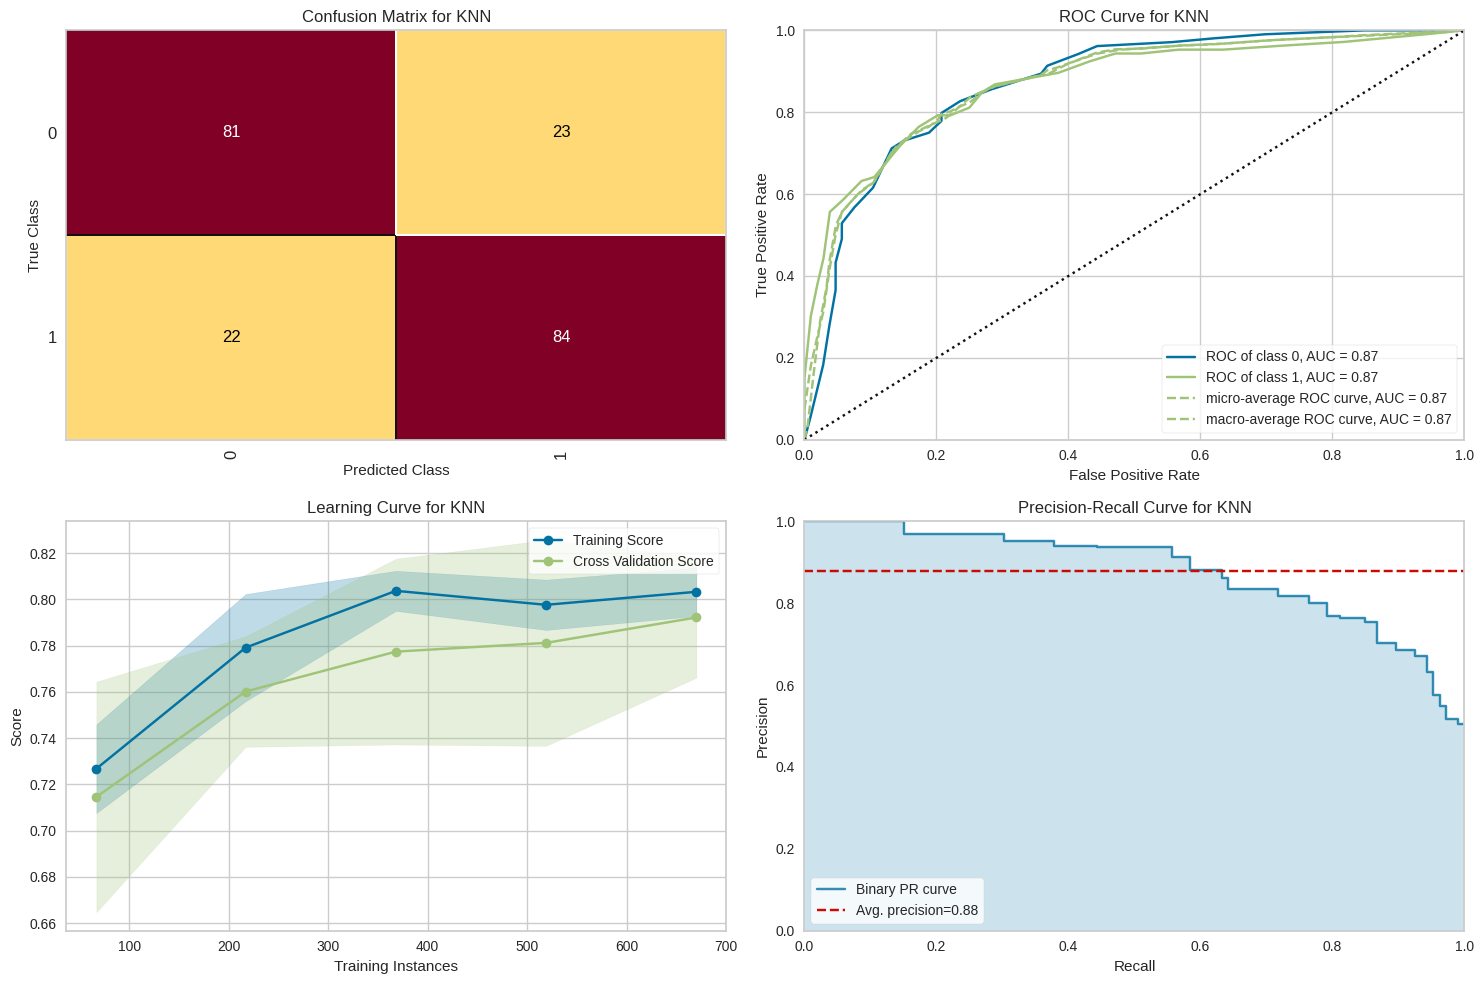

In [ ]:
visualize_model_performance(best_knn, "KNN", X_train, y_train, X_test, y_test)

## **Permutation Importance**

After training the model, using permutation importance provides a more nuanced assessment, as it evaluates feature importance in the context of the trained model's performance. This second assessment on feature importance can reveal interactions or dependencies between features that were not apparent before, allowing for further refinement.

In [ ]:
# Calculate Permutation Importance
knn_permutation_importance = permutation_importance(best_knn, X_test, y_test, n_repeats=30, random_state=42)

print("Number of Features:", len(X.columns))
print("Permutation Importances Mean Length:", len(knn_permutation_importance.importances_mean))

Number of Features: 9
Permutation Importances Mean Length: 9


               Feature  Importance       Std
8             ST slope    0.147619  0.027077
2      chest pain type    0.053651  0.019085
6      exercise angina    0.010794  0.011725
4          resting ecg   -0.000159  0.010175
3  fasting blood sugar   -0.001111  0.004203
7              oldpeak   -0.001746  0.008383
0                  age   -0.003492  0.011530
1                  sex   -0.010952  0.009213
5       max heart rate   -0.012698  0.007612


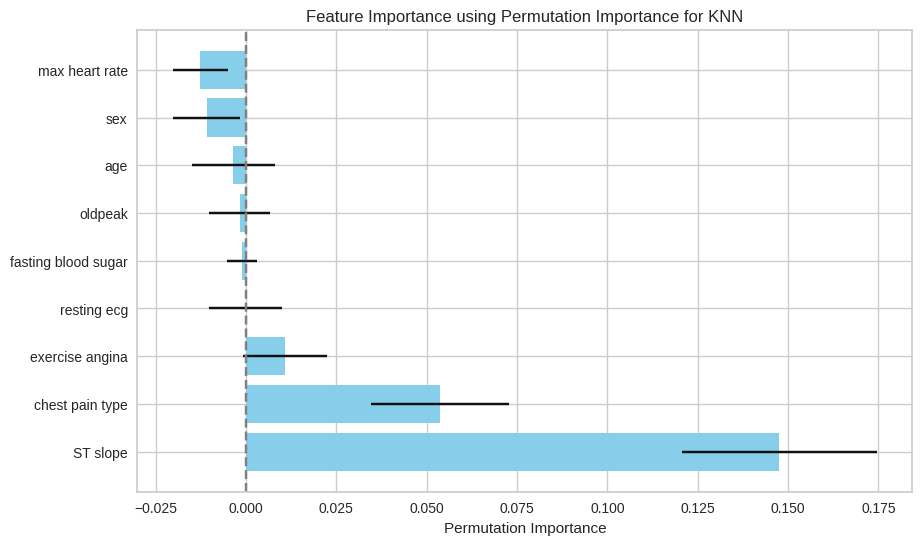

In [ ]:
# Create a DataFrame for feature importances
knn_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': knn_permutation_importance.importances_mean,
    'Std': knn_permutation_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(knn_feature_importances)

# Plotting the Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(knn_feature_importances['Feature'], knn_feature_importances['Importance'], xerr=knn_feature_importances['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance for KNN')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.show()

Insights from the Data:
- Most Important Feature:
ST slope has the highest importance (0.147619), indicating it is the most influential feature in the model.
- Positive Contribution:
Chest pain type is also a positive contributor, but to a lesser extent (0.053651).
- Less Important Features:
Exercise angina has very importance scores and show limited impact on the model's predictions.
- Negative Contributions:
Several features have negative importance scores (e.g., max heart rate, sex, age, oldpeak, fasting blood sugar, and resting ecg), suggesting that increases in these features may lead to lower predicted outcomes, depending on the target variable.
- Variability:
The standard deviation values indicate how consistent the importance scores are across different permutations. Lower values (like for exercise angina) suggest that the feature’s importance is relatively stable, while higher values (like for ST slope) indicate a bit more variability in its importance.

### Feature Elimination

In [ ]:
# Dropping features with negative importance
features_to_drop = knn_feature_importances[knn_feature_importances['Importance'] < 0]['Feature'].tolist()
X_reduced_knn = X.drop(columns=features_to_drop)

# Split the reduced dataset into training and testing sets
X_train_reduced_knn, X_test_reduced_knn, y_train_reduced_knn, y_test_reduced_knn = train_test_split(X_reduced_knn, y, test_size=0.2, random_state=42)

### Model Retraining

In [ ]:
# Retrain the KNN model with reduced features and best hyperparameters found in Method 4

best_knn_reduced = GridSearchCV(knn, param_grid=params_knn_4, cv=kf, n_jobs=-1)
best_knn_reduced.fit(X_train_reduced_knn, y_train_reduced_knn)

# Make predictions on the reduced test set
y_pred_knn_reduced = best_knn_reduced.predict(X_test_reduced_knn)

# Get the best parameters and best score from the grid search
knn_best_params_reduced = best_knn_reduced.best_params_
knn_best_score_reduced = best_knn_reduced.best_score_

print(f"Best Hyperparameters after dropping negative features: {knn_best_params_reduced}")
print(f"Best Cross-Validation Accuracy after dropping negative features: {knn_best_score_reduced:.4f}")

# Calculate the Train Accuracy
train_accuracy_knn_reduced = best_knn_reduced.score(X_train_reduced_knn, y_train_reduced_knn) * 100
print("Train Accuracy with best hyperparameters in this method after dropping negative features: {:.2f}%".format(train_accuracy_knn_reduced))

# Calculate the Test Accuracy
test_accuracy_knn_reduced = best_knn_reduced.score(X_test_reduced_knn, y_test_reduced_knn) * 100
print("Test Accuracy with best hyperparameters in this method after dropping negative features: {:.2f}%".format(test_accuracy_knn_reduced))

Best Hyperparameters after dropping negative features: {'metric': 'manhattan', 'n_neighbors': 28}
Best Cross-Validation Accuracy after dropping negative features: 0.7947
Train Accuracy with best hyperparameters in this method after dropping negative features: 80.31%
Test Accuracy with best hyperparameters in this method after dropping negative features: 80.00%


### Performance Evaluations after Feature Elimination

#### Classification Report for KNN

In [ ]:
# Make predictions on the test dataset (X_test_reduced_knn)
y_pred_knn_reduced = best_knn_reduced.predict(X_test_reduced_knn)

# Get Probability Estimates for the Positive Class
y_prob_knn_reduced = best_knn_reduced.predict_proba(X_test_reduced_knn)[:, 1]

# Print classification report
print(classification_report(y_test_reduced_knn, y_pred_knn_reduced))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       104
           1       0.79      0.83      0.81       106

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



#### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for KNN

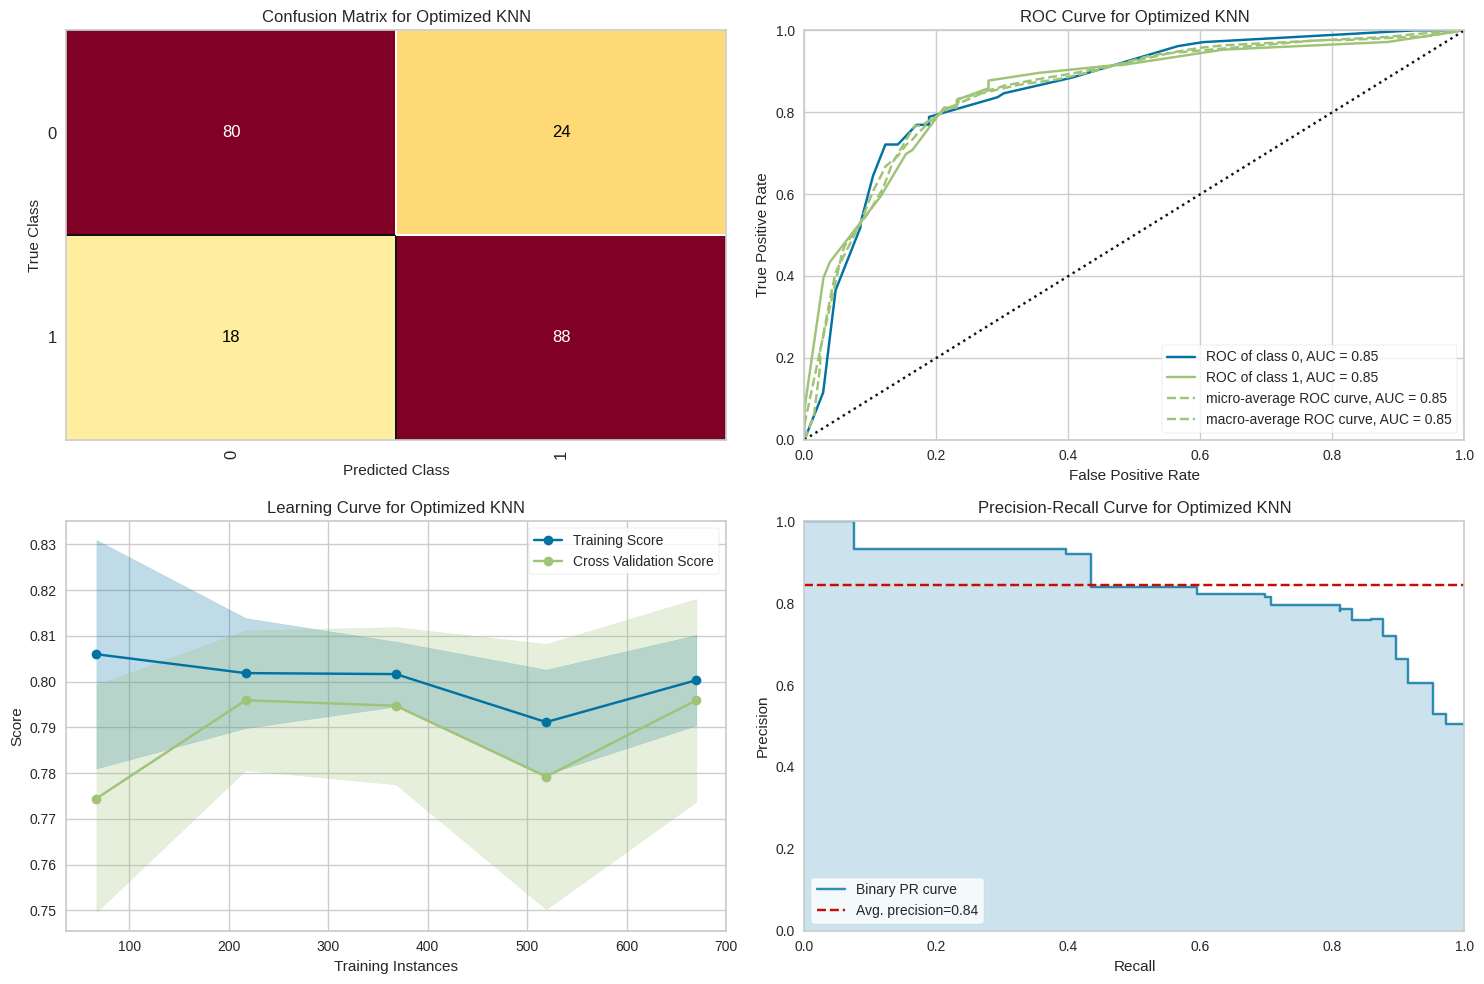

In [ ]:
visualize_model_performance(best_knn_reduced, "Optimized KNN", X_train_reduced_knn, y_train_reduced_knn, X_test_reduced_knn, y_test_reduced_knn)

# Model 3: Support Vector Machine (SVM)

## **Comparison of SVM Approaches**

### Approach 1: Default Settings

In [ ]:
# Initiate SVC with default parameters
svm_default = SVC()

# Check the default parameters in an SVC
print(svm_default.get_params())

# Fit the model to the training data
svm_default.fit(X_train,y_train)

# Calculate the Train Accuracy
train_accuracy_svm_default = svm_default.score(X_train, y_train)*100
print("Train Accuracy using default settings: {:.2f}%".format(train_accuracy_svm_default))

# Calculate the Test Accuracy
test_accuracy_svm_default = svm_default.score(X_test, y_test)*100
print("Test Accuracy using default settings: {:.2f}%".format(test_accuracy_svm_default))

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Train Accuracy using default settings: 82.22%
Test Accuracy using default settings: 78.10%


We achieved a test accuracy of 78.10% without tuning the hyperparameters. Let's proceed with manual tuning to see if we can improve this accuracy.

### Approach 2: Manual Tuning

In [ ]:
svm = SVC(gamma=0.5, C=2.0, probability=True)  # Increased gamma and C values, also set probability=True for ROC and Precision-Recall curves
svm.fit(X_train, y_train)

# Calculate the Train Accuracy
train_accuracy_svm_manual = svm.score(X_train, y_train)*100
print("Train Accuracy using manual tuning: {:.2f}%".format(train_accuracy_svm_manual))

# Calculate the Test Accuracy
test_accuracy_svm_manual = svm.score(X_test, y_test)*100
print("Test Accuracy using manual tuning: {:.2f}%".format(test_accuracy_svm_manual))

Train Accuracy using manual tuning: 94.75%
Test Accuracy using manual tuning: 73.81%


The substantial gap between the train and test accuracies implies that the model is likely overfitting. While it performs well on the training set, it fails to maintain that performance when tested on new, unseen data. This occurs when the model is too complex or when the hyperparameters are not well-tuned for generalization. We consider adjusting the C and gamma values further by hyperparameter tuning to see if a different combination can enhance test performance.

### Approach 3: Hyperparameter Tuning using GridSearchCV

In [ ]:
# Initialize the SVC classifier, also set probability=True for ROC and Precision-Recall curves
svm_cv = SVC(kernel='rbf', probability=True)

# Define another hyperparameter grid for tuning
param_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm_cv, param_grid=param_svm, n_jobs=-1, cv=5, scoring="accuracy")
best_svm = svm_grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = best_svm.predict(X_test)

# Get the best hyperparameter and best cross-validation score
best_params_svm = best_svm.best_params_
best_score_svm = best_svm.best_score_

print(f"Best Hyperparameter: {best_params_svm}")
print(f"Best Cross-Validation Accuracy: {best_score_svm:.4f}")

# Calculate the Train Accuracy
train_accuracy_svm_grid = best_svm.score(X_train, y_train)*100
print("Train Accuracy with the best hyperparameter: {:.2f}%".format(train_accuracy_svm_grid))

# Calculate the Test Accuracy
test_accuracy_svm_reduced = best_svm.score(X_test, y_test)*100
print("Test Accuracy with the best hyperparameter: {:.2f}%".format(test_accuracy_svm_reduced))

Best Hyperparameter: {'C': 1000, 'gamma': 0.01}
Best Cross-Validation Accuracy: 0.7923
Train Accuracy with the best hyperparameter: 85.20%
Test Accuracy with the best hyperparameter: 79.05%


## **Performance Evaluations for SVM**

### Classification Report for SVM

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       104
           1       0.77      0.83      0.80       106

    accuracy                           0.79       210
   macro avg       0.79      0.79      0.79       210
weighted avg       0.79      0.79      0.79       210



### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for SVM

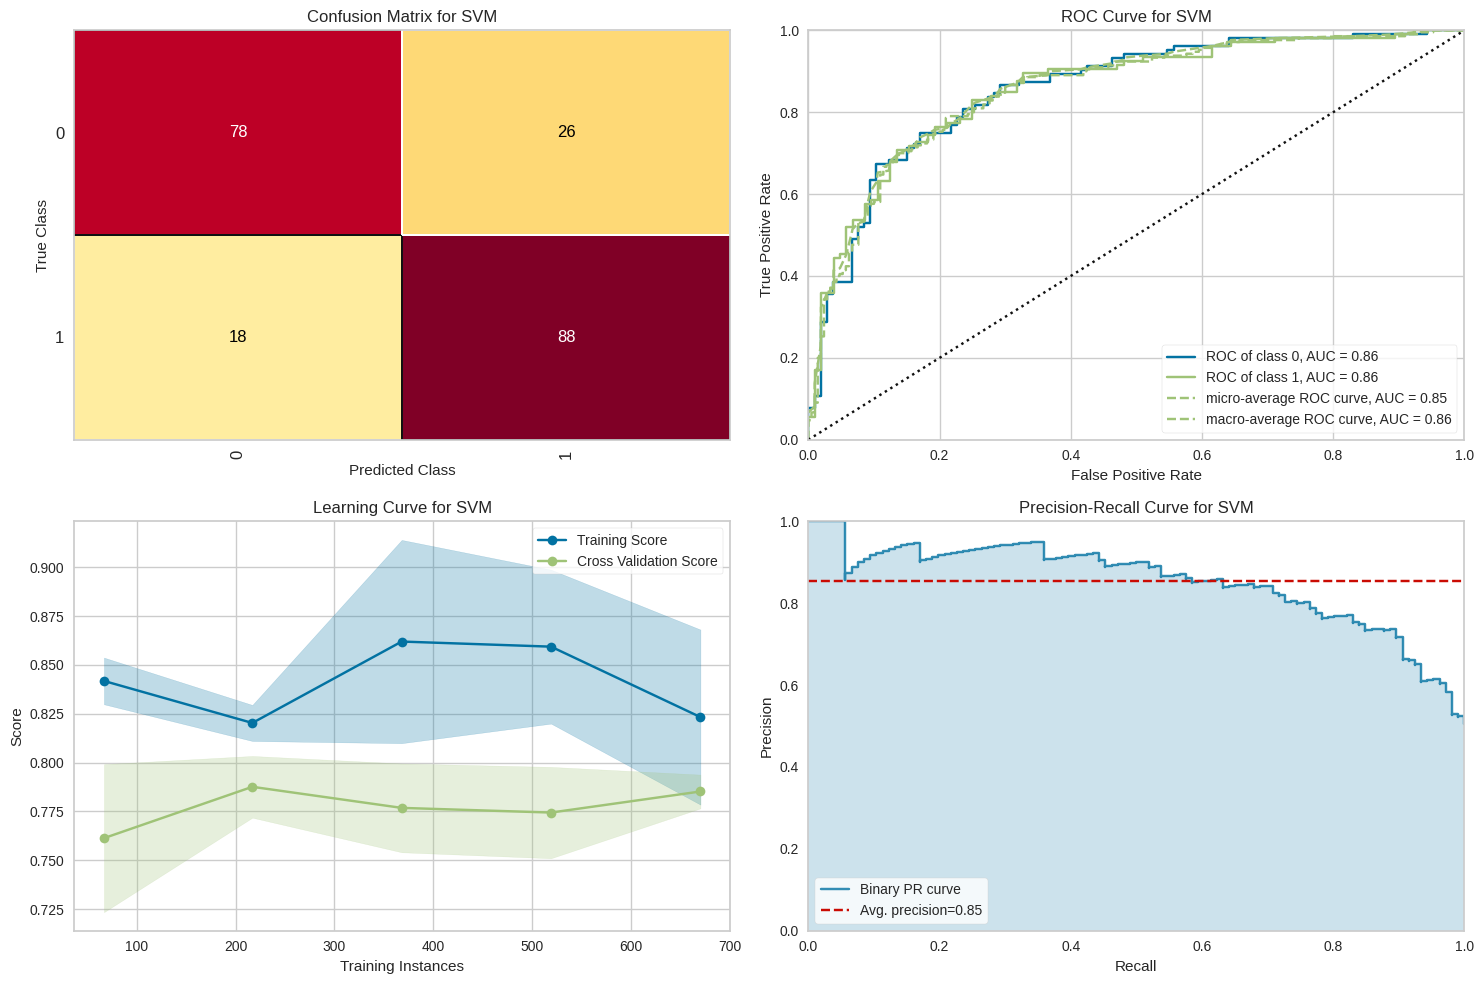

In [ ]:
visualize_model_performance(best_svm, "SVM", X_train, y_train, X_test, y_test)

## **Permutation Importance**

In [ ]:
# Calculate Permutation Importance
svm_permutation_importance = permutation_importance(best_svm, X_test, y_test, n_repeats=30, random_state=42)

print("Number of Features:", len(X.columns))
print("Permutation Importances Mean Length:", len(svm_permutation_importance.importances_mean))

Number of Features: 9
Permutation Importances Mean Length: 9


               Feature  Importance       Std
8             ST slope    0.195873  0.023092
2      chest pain type    0.065238  0.017307
6      exercise angina    0.024286  0.015810
4          resting ecg    0.021111  0.013729
7              oldpeak    0.010635  0.009175
0                  age    0.006190  0.010516
1                  sex    0.005556  0.010511
3  fasting blood sugar   -0.000952  0.006197
5       max heart rate   -0.001905  0.011442


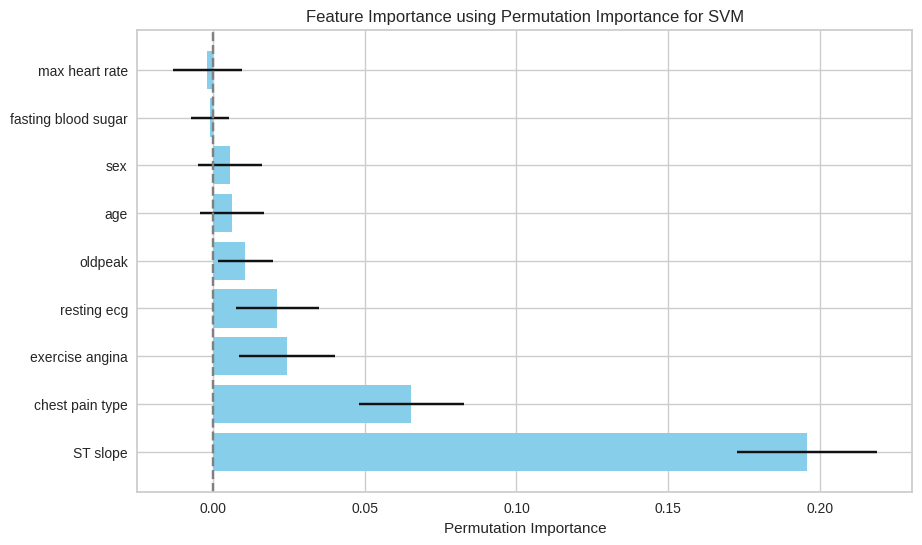

In [ ]:
# Create a DataFrame for feature importances
svm_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': svm_permutation_importance.importances_mean,
    'Std': svm_permutation_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(svm_feature_importances)

# Plotting the Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importances['Feature'], svm_feature_importances['Importance'], xerr=svm_feature_importances['Std'], color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Feature Importance using Permutation Importance for SVM')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0 for reference
plt.show()

### Feature Elimination

In [ ]:
# Dropping features with negative importance
features_to_drop = svm_feature_importances[svm_feature_importances['Importance'] < 0]['Feature'].tolist()
X_reduced_svm = X.drop(columns=features_to_drop)

# Split the reduced dataset into training and testing sets
X_train_reduced_svm, X_test_reduced_svm, y_train_reduced_svm, y_test_reduced_svm = train_test_split(X_reduced_svm, y, test_size=0.2, random_state=42)

### Model Retraining

In [ ]:
# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm_cv, param_grid=param_svm, n_jobs=-1, cv=5, scoring="accuracy")
best_svm_reduced = svm_grid_search.fit(X_train_reduced_svm, y_train_reduced_svm)

# Make predictions on the test set
y_pred_svm_reduced = best_svm_reduced.predict(X_test_reduced_svm)

# Get the best hyperparameter and best cross-validation score
best_params = best_svm.best_params_
best_score = best_svm.best_score_

print(f"Best Hyperparameter: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Calculate the Train Accuracy
train_accuracy_svm_reduced = best_svm_reduced.score(X_train_reduced_svm, y_train_reduced_svm)*100
print("Train Accuracy with the best hyperparameter: {:.2f}%".format(train_accuracy_svm_reduced))

# Calculate the Test Accuracy
test_accuracy_svm_reduced = best_svm_reduced.score(X_test_reduced_svm, y_test_reduced_svm)*100
print("Test Accuracy with the best hyperparameter: {:.2f}%".format(test_accuracy_svm_reduced))

Best Hyperparameter: {'C': 1000, 'gamma': 0.01}
Best Cross-Validation Accuracy: 0.7923
Train Accuracy with the best hyperparameter: 82.58%
Test Accuracy with the best hyperparameter: 80.00%


### Performance Evaluations after Feature Elimination

#### Classification Report for SVM

In [ ]:
print(classification_report(y_test_reduced_svm, y_pred_svm_reduced))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       104
           1       0.79      0.83      0.81       106

    accuracy                           0.80       210
   macro avg       0.80      0.80      0.80       210
weighted avg       0.80      0.80      0.80       210



#### Confusion Matrix, ROC Curve, Learning Curve, Precision-Recall Curve for SVM

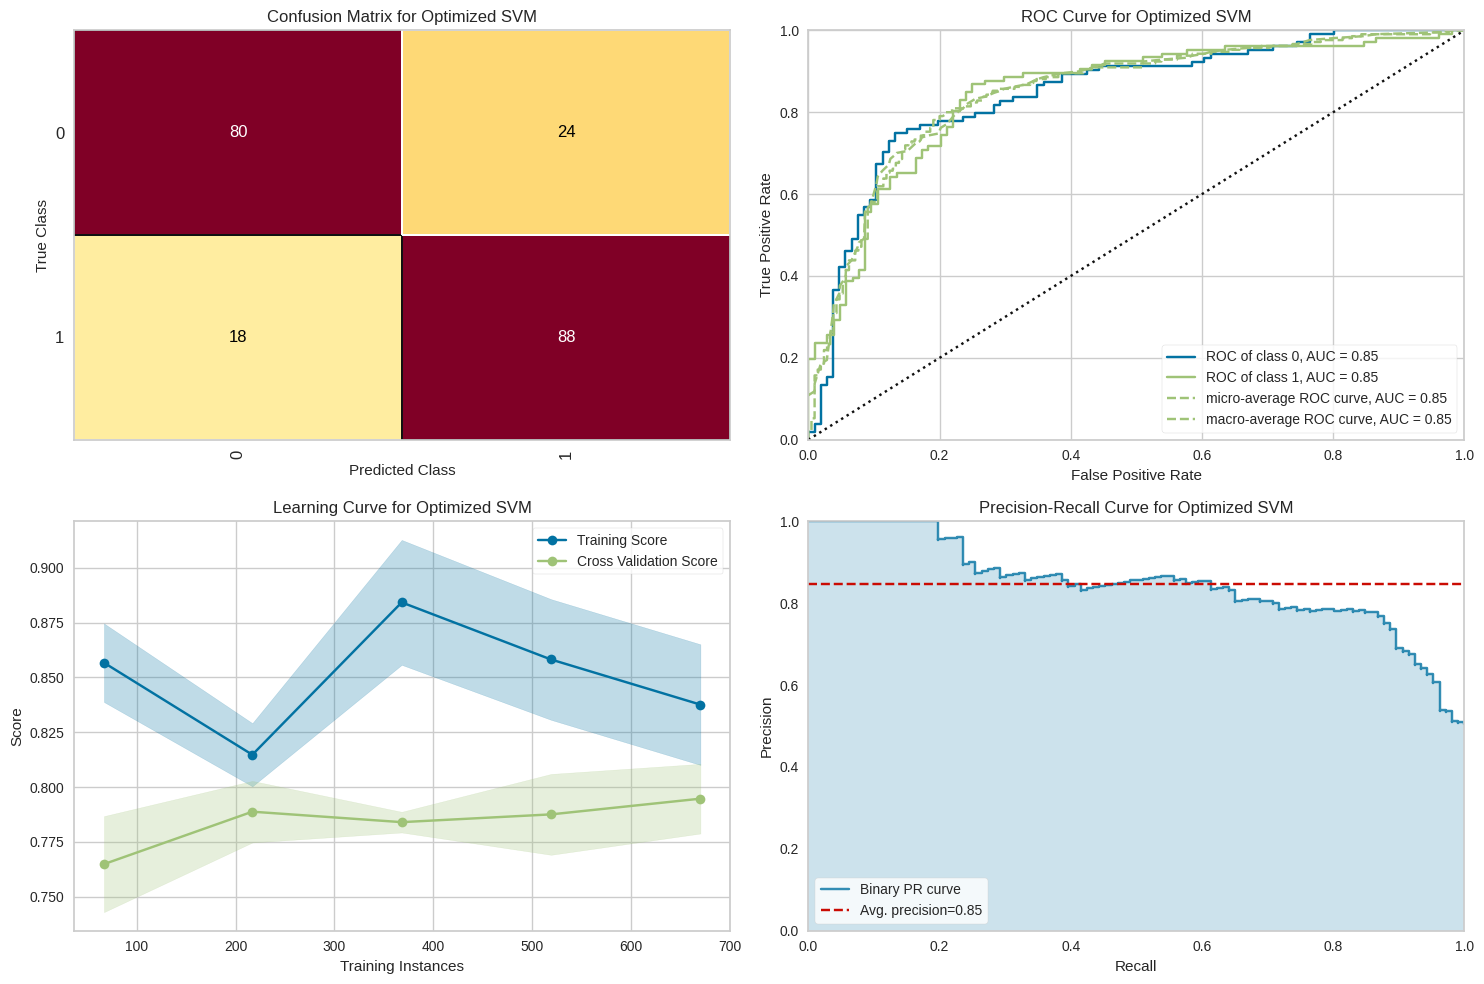

In [ ]:
# Visualize model performance for the best SVM model
visualize_model_performance(best_svm_reduced, "Optimized SVM", X_train_reduced_svm, y_train_reduced_svm, X_test_reduced_svm, y_test_reduced_svm)

# Comparative Analysis: Optimized GNB, KNN and SVM Models

## Train and Test Accuracies by Model

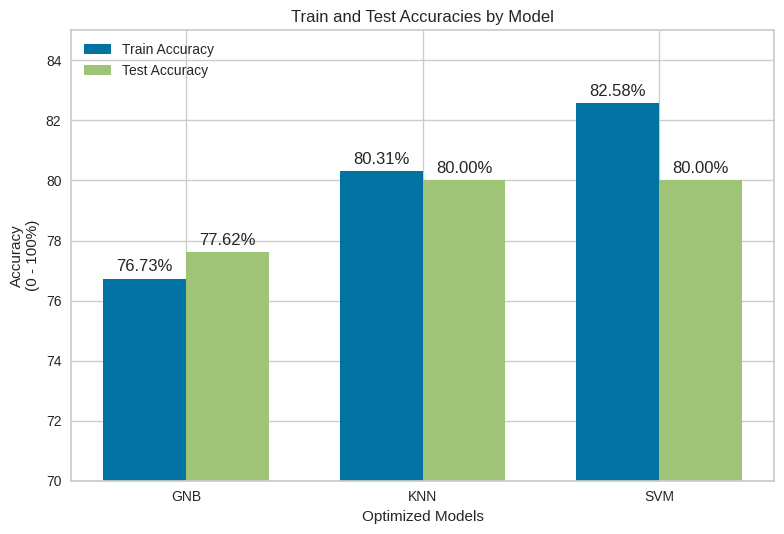

In [ ]:
models = ['GNB', 'KNN', 'SVM']
train_accuracies = [train_accuracy_gnb_reduced, train_accuracy_knn_reduced, train_accuracy_svm_reduced]
test_accuracies = [test_accuracy_gnb_reduced, test_accuracy_knn_reduced, test_accuracy_svm_reduced]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_xlabel('Optimized Models')
ax.set_ylabel('Accuracy\n(0 - 100%)')
ax.set_title('Train and Test Accuracies by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper left')

# Set y-axis scale from 70% to 90%
ax.set_ylim(70, 85)

# Attach a text label above each bar, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Interpretation:
- All three models exhibit similar levels of accuracy, indicating that they have comparable overall performance.
- GNB has the lowest accuracy among the three models, suggesting it may be less effective at predicting heart disease compared to KNN and SVM.
- The Test Accuracy for KNN and SVM is exactly the same, which means they perform equally well when evaluated on unseen data.
- The discrepancy between the train accuracy and test accuracy for KNN is the least among all three models. This means that KNN has the smallest difference between how well it performs on the data it was trained on and how it performs on new, unseen data. A smaller discrepancy is generally desirable as it indicates that the model has better generalization capabilities and is less likely to overfit to the training data. Thus, KNN's lower discrepancy suggests it has a better balance between fitting the training data and maintaining the ability to generalize to new data.

## Confusion Matrix by Model

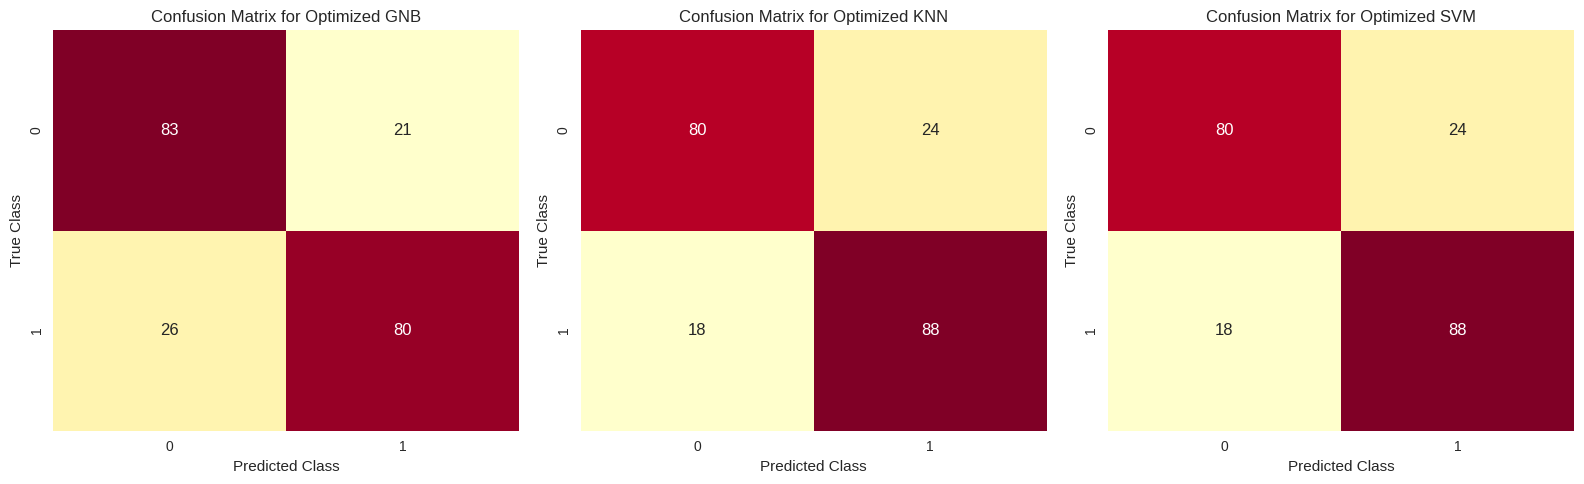

In [ ]:
cm_gnb = confusion_matrix(y_test_reduced_gnb, y_pred_gnb_reduced)
cm_knn = confusion_matrix(y_test_reduced_knn, y_pred_knn_reduced)
cm_svm = confusion_matrix(y_test_reduced_svm, y_pred_svm_reduced)

# Set up the figure size
plt.figure(figsize=(16, 5))

# Plot for GNB
plt.subplot(1, 3, 1)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title('Confusion Matrix for Optimized GNB')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Plot for KNN
plt.subplot(1, 3, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title('Confusion Matrix for Optimized KNN')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Plot for SVM
plt.subplot(1, 3, 3)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlOrRd', cbar=False)
plt.title('Confusion Matrix for Optimized SVM')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Show the plots
plt.tight_layout()
plt.show()

Interpretation:
- There are 104 actual negative cases and 106 actual positive cases in the test dataset.
- GNB has slightly better TN and FP rates compared to KNN and SVM, indicating better classification of negative cases (a difference of 3 cases).
- KNN and SVM have better TP and FN rates compared to GNB, indicating better classification of positive cases (a difference of 8 cases).
- All the values for TN, FP, FN, and TP are the same for both KNN and SVM. It indicates that these models have performed identically in terms of correctly and incorrectly classifying the positive and negative cases in the given dataset. The test accuracy of 80.00% mirrors this consistency, with both models demonstrating equal accuracy due to matching counts of correctly and incorrectly classified cases.

## Precision, Recall, F1 Scores by Model

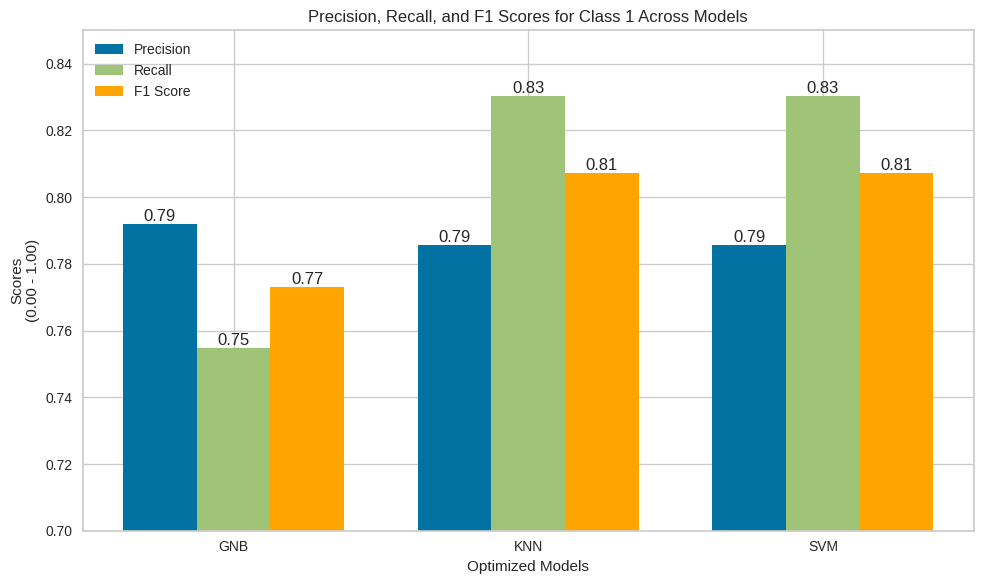

In [ ]:
# Calculate precision, recall, and f1 score for each model
precision_gnb = precision_score(y_test_reduced_gnb, y_pred_gnb_reduced)
recall_gnb = recall_score(y_test_reduced_gnb, y_pred_gnb_reduced)
f1_gnb = f1_score(y_test_reduced_gnb, y_pred_gnb_reduced)

precision_knn = precision_score(y_test_reduced_knn, y_pred_knn_reduced)
recall_knn = recall_score(y_test_reduced_knn, y_pred_knn_reduced)
f1_knn = f1_score(y_test_reduced_knn, y_pred_knn_reduced)

precision_svm = precision_score(y_test_reduced_svm, y_pred_svm_reduced)
recall_svm = recall_score(y_test_reduced_svm, y_pred_svm_reduced)
f1_svm = f1_score(y_test_reduced_svm, y_pred_svm_reduced)

# Prepare data for the clustered bar chart
labels = ['GNB', 'KNN', 'SVM']
precision = [precision_gnb, precision_knn, precision_svm]
recall = [recall_gnb, recall_knn, recall_svm]
f1 = [f1_gnb, f1_knn, f1_svm]

x = np.arange(len(labels))
width = 0.25

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the bars
bars1 = plt.bar(x - width, precision, width, label='Precision')
bars2 = plt.bar(x, recall, width, label='Recall')
bars3 = plt.bar(x + width, f1, width, label='F1 Score', color='orange')


plt.ylabel('Scores\n(0.00 - 1.00)')
plt.xlabel('Optimized Models')
plt.title('Precision, Recall, and F1 Scores for Class 1 Across Models')
plt.xticks(x, labels)
plt.ylim(0.7, 0.85)
plt.legend(loc='upper left')

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
                 ha='center', va='bottom')  # va: vertical alignment

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

Interpretation:
- All three models exhibit an identical precision of 0.79, indicating that they all have the same proportion of true positive predictions among all positive predictions made.
- KNN and SVM both achieve a recall of 0.83, which is superior to the recall of 0.75 for GNB. This means KNN and SVM are more effective at capturing positive instances.
- KNN and SVM have an F1 score of 0.81, outperforming GNB's F1 score of 0.77, suggesting that KNN and SVM offer a better balance between precision and recall.
- Since the counts for TN, FP, FN, and TP are the same for KNN and SVM, these models share identical precision, recall, and F1 scores, reflecting their consistent performance in classifying instances.

## ROC Curve by Model

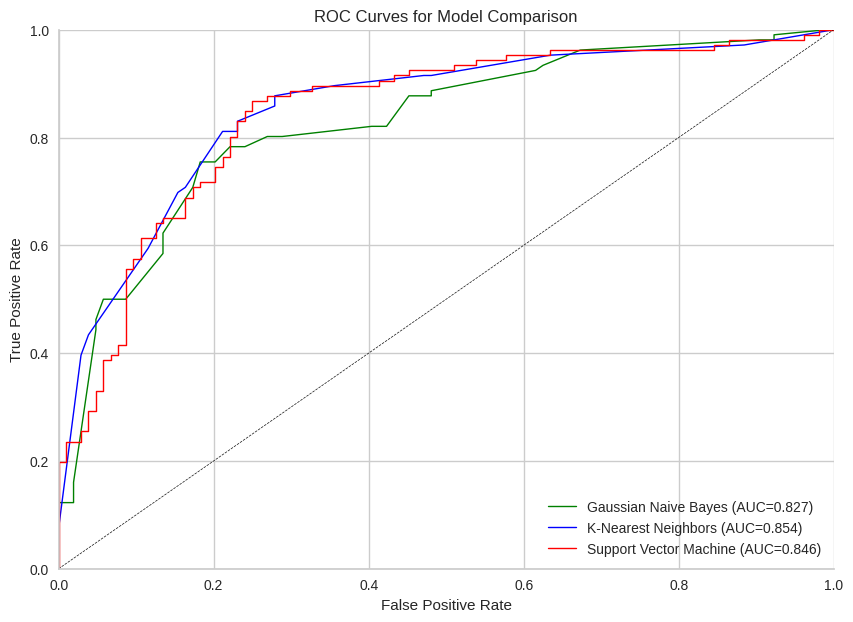

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='blue'):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw, color=color,
            label="%s (AUC=%.3f)" % (label, roc_auc_score(y_true, y_proba[:, 1])))

# Create a figure for the ROC curve
f, ax = plt.subplots(figsize=(10, 7))

# Plot ROC for the models
roc_auc_plot(y_test_reduced_gnb, best_gnb_reduced.predict_proba(X_test_reduced_gnb), label='Gaussian Naive Bayes', l='-', color='green')
roc_auc_plot(y_test_reduced_knn, best_knn_reduced.predict_proba(X_test_reduced_knn), label='K-Nearest Neighbors', l='-', color='blue')
roc_auc_plot(y_test_reduced_svm, best_svm_reduced.predict_proba(X_test_reduced_svm), label='Support Vector Machine', l='-', color='red')

# Add a diagonal line for reference
ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')

ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC Curves for Model Comparison')
sns.despine()
plt.show()

Interpretation:
- The ROC curve for the GNB model is positioned lower than those of the KNN and SVM models, suggesting that GNB is less effective at distinguishing between the positive and negative classes compared to KNN and SVM. With an AUC of 0.827, GNB lags behind both KNN and SVM in terms of its classification accuracy.
- The ROC curves for KNN and SVM are closely overlapping, which indicates that their performance is quite similar.
-  The AUC values reveal a slight edge for KNN, with an AUC of 0.854, compared to SVM's AUC of 0.846. This suggests that, while the performance of KNN and SVM is closely matched, KNN has a marginally better ability to discriminate between classes than SVM, as evidenced by its higher AUC.

## Precision-Recall Curve by Model

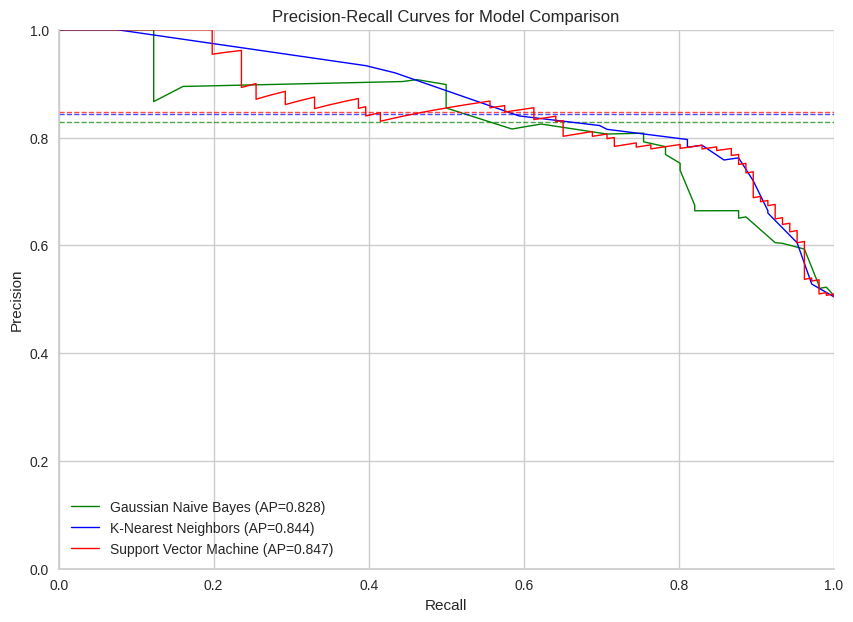

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='blue'):
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:, 1])
    average_precision = average_precision_score(y_true, y_proba[:, 1], average="micro")

    # Plot Precision-Recall curve
    ax.plot(recall, precision, label='%s (AP=%.3f)' % (label, average_precision), linestyle=l, linewidth=lw, color=color)

    # Draw a dashed line at the average precision score
    ax.axhline(y=average_precision, color=ax.lines[-1].get_color(), linestyle='--', linewidth=1, alpha=0.7)

# Create a figure for the Precision-Recall curve
f, ax = plt.subplots(figsize=(10, 7))

# Plot Precision-Recall curves for the models
precision_recall_plot(y_test_reduced_gnb, best_gnb_reduced.predict_proba(X_test_reduced_gnb), label='Gaussian Naive Bayes', l='-', color='green')
precision_recall_plot(y_test_reduced_knn, best_knn_reduced.predict_proba(X_test_reduced_knn), label='K-Nearest Neighbors', l='-', color='blue')
precision_recall_plot(y_test_reduced_svm, best_svm_reduced.predict_proba(X_test_reduced_svm), label='Support Vector Machine', l='-', color='red')

# Customize the plot
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves for Model Comparison')
sns.despine()

# Show the plot
plt.show()

Interpretation:
- The KNN and SVM models have an average precision (AP) of 0.844 and 0.847 respectively , suggesting they perform  better than GNB with an AP of 0.828, in terms of precision and recall for the positive class.
- The SVM model exhibits a slightly higher AP of 0.847 compared to the KNN model's AP of 0.844. However, KNN's precision and recall values are more stable across different thresholds compared to SVM, which could be beneficial in scenarios where a consistent performance is more critical than achieving the highest precision or recall at specific thresholds.

# Conclusion

- The KNN model is slightly superior, showing the highest AUC and stable precision-recall curve, which indicates consistent classification performance across various thresholds. It also matches or exceeds the performance of SVM and GNB in accuracy and metrics for positive case classification.
- The SVM model closely follows KNN, with a slightly higher AP, suggesting marginally better precision and recall balance at certain thresholds. However, KNN's overall stability and higher AUC make it more reliable across a broader range of classification settings.
- While the GNB model shows a minor advantage in classifying negative cases and matches the precision of KNN and SVM, it overall lags behind in terms of AUC, AP, and the ability to classify positive cases, making it the least effective among the three models.